# Solving the n-Queens Problem using Local Search

Student Name: Daniel Zoch

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: DZ

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


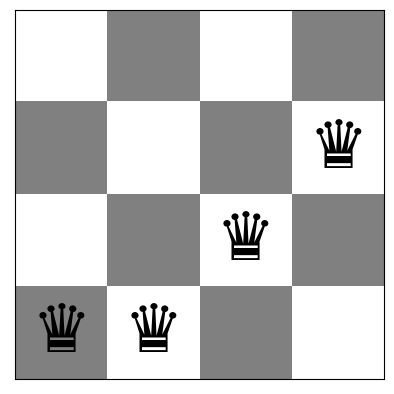

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [3]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


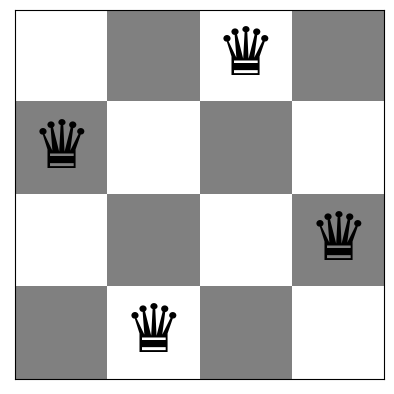

In [4]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

Best board found with 8 conflicts:
Board with 8 conflicts.


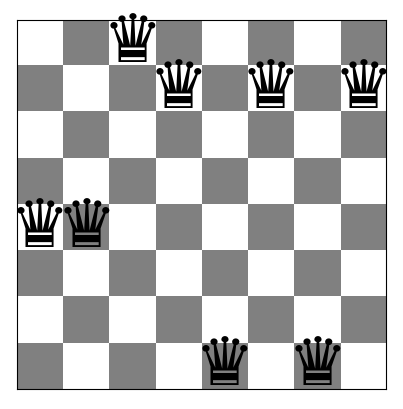

In [5]:
def steepest_ascend_hill_climbing(n, max_iterations=1000):
    best_board = random_board(n)
    best_conflicts = conflicts(best_board)
    
    for _ in range(max_iterations):
        neighbors = [best_board.copy() for _ in range(n)]
        for i in range(n):
            for j in range(n):
                neighbors[i][j] = j
        
        for neighbor in neighbors:
            neighbor_conflicts = conflicts(neighbor)
            if neighbor_conflicts < best_conflicts:
                best_board = neighbor
                best_conflicts = neighbor_conflicts
        
        if best_conflicts == 0:
            break
    
    return best_board, best_conflicts

n = 8  # You can change the board size
best_board, best_conflicts = steepest_ascend_hill_climbing(n)
print(f"Best board found with {best_conflicts} conflicts:")
show_board(best_board)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Best board found with 8 conflicts:
Board with 8 conflicts.


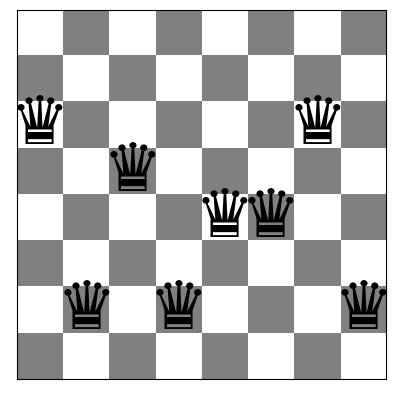

In [12]:
def stochastic_hill_climbing1(n, max_iterations=1000):
    current_board = random_board(n)
    current_conflicts = conflicts(current_board)
    
    for _ in range(max_iterations):
        neighbors = [current_board.copy() for _ in range(n)]
        for i in range(n):
            for j in range(n):
                neighbors[i][j] = j
        
        uphill_neighbors = []
        for neighbor in neighbors:
            neighbor_conflicts = conflicts(neighbor)
            if neighbor_conflicts < current_conflicts:
                uphill_neighbors.append(neighbor)
        
        if not uphill_neighbors:
            break
        
        chosen_neighbor = np.random.choice(uphill_neighbors)
        current_board = chosen_neighbor
        current_conflicts = conflicts(current_board)
        
        if current_conflicts == 0:
            break
    
    return current_board, current_conflicts

n = 8  # You can change the board size
best_board, best_conflicts = stochastic_hill_climbing1(n)
print(f"Best board found with {best_conflicts} conflicts:")
show_board(best_board)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Best board found with 7 conflicts:
Board with 7 conflicts.


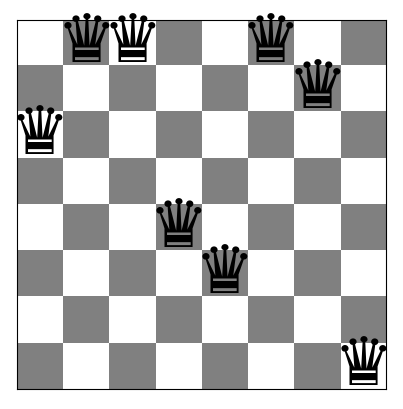

In [18]:
def stochastic_hill_climbing2(n, max_iterations=1000, max_attempts=10):
    best_board = random_board(n)
    best_conflicts = conflicts(best_board)
    
    for _ in range(max_attempts):
        current_board = random_board(n)
        current_conflicts = conflicts(current_board)
        
        for _ in range(max_iterations):
            neighbors = [current_board.copy() for _ in range(n)]
            for i in range(n):
                for j in range(n):
                    neighbors[i][j] = j
            
            uphill_neighbors = []
            for neighbor in neighbors:
                neighbor_conflicts = conflicts(neighbor)
                if neighbor_conflicts < current_conflicts:
                    uphill_neighbors.append(neighbor)
            
            if not uphill_neighbors:
                break
            
            chosen_neighbor = np.random.choice(uphill_neighbors)
            current_board = chosen_neighbor
            current_conflicts = conflicts(current_board)
            
            if current_conflicts == 0:
                return current_board, current_conflicts
    
    return best_board, best_conflicts

n = 8  # You can change the board size
best_board, best_conflicts = stochastic_hill_climbing2(n)
print(f"Best board found with {best_conflicts} conflicts:")
show_board(best_board)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Best board found with 4 conflicts:
Board with 4 conflicts.


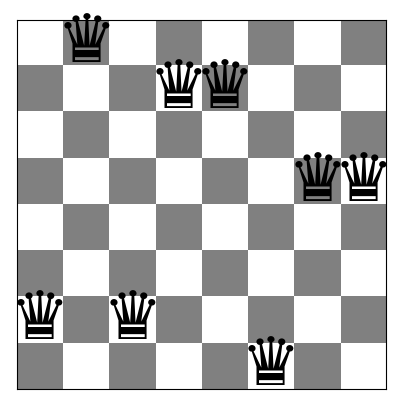

In [31]:
def hill_climbing_with_restarts(n, max_iterations=1000, max_restarts=100):
    best_board = random_board(n)
    best_conflicts = conflicts(best_board)
    
    for _ in range(max_restarts):
        current_board = random_board(n)
        current_conflicts = conflicts(current_board)
        
        for _ in range(max_iterations):
            neighbors = [current_board.copy() for _ in range(n)]
            for i in range(n):
                for j in range(n):
                    neighbors[i][j] = j
            
            uphill_neighbors = []
            for neighbor in neighbors:
                neighbor_conflicts = conflicts(neighbor)
                if neighbor_conflicts < current_conflicts:
                    uphill_neighbors.append(neighbor)
            
            if not uphill_neighbors:
                break
            
            chosen_neighbor = np.random.choice(uphill_neighbors)
            current_board = chosen_neighbor
            current_conflicts = conflicts(current_board)
            
            if current_conflicts == 0:
                return current_board, current_conflicts
        
        if current_conflicts < best_conflicts:
            best_board = current_board
            best_conflicts = current_conflicts
    
    return best_board, best_conflicts

n = 8  # You can change the board size
best_board, best_conflicts = hill_climbing_with_restarts(n)
print(f"Best board found with {best_conflicts} conflicts:")
show_board(best_board)

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Results:
  n   |  Steepest Ascend  |  Stochastic HC1  |  Stochastic HC2  |  HC with Restarts
----------------------------------------------------------------------
  4   |       3.50       |       3.70       |       3.60       |       0.40      
  8   |       7.20       |       7.10       |       7.90       |       3.10      
  12  |      13.20       |      12.70       |      15.40       |       5.70      
  16  |      17.40       |      16.90       |      17.70       |       8.90      
  20  |      23.00       |      19.30       |      24.60       |      12.30      


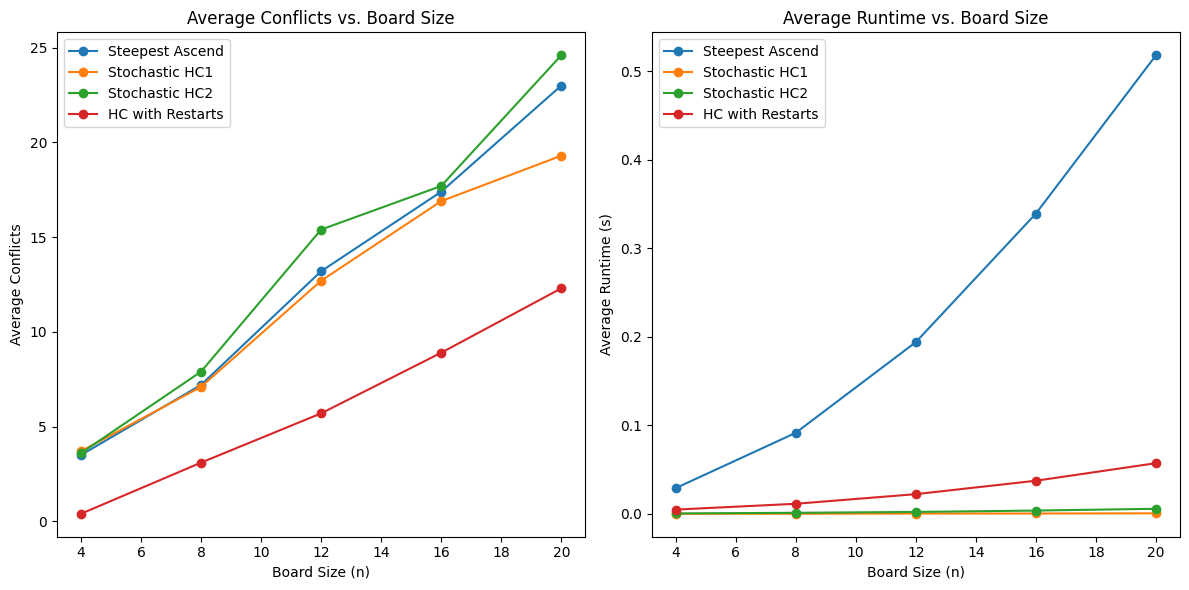

In [37]:
# Compare Performance
import time

# Helper function to run an algorithm and measure its runtime
def run_algorithm(algorithm, n, max_iterations=1000, max_restarts=100, repetitions=10):
    runtimes = []
    conflicts_list = []
    for _ in range(repetitions):
        start_time = time.time()
        best_board, best_conflicts = algorithm(n)
        end_time = time.time()
        runtime = end_time - start_time
        runtimes.append(runtime)
        conflicts_list.append(best_conflicts)
    avg_runtime = sum(runtimes) / repetitions
    avg_conflicts = sum(conflicts_list) / repetitions
    return avg_runtime, avg_conflicts

n_values = [4, 8, 12, 16, 20]  # Different board sizes to explore
results = []

# Compare the algorithms for different board sizes
for n in n_values:
    steepest_ascend_runtime, steepest_ascend_conflicts = run_algorithm(steepest_ascend_hill_climbing, n)
    stochastic_hill_climbing1_runtime, stochastic_hill_climbing1_conflicts = run_algorithm(stochastic_hill_climbing1, n)
    stochastic_hill_climbing2_runtime, stochastic_hill_climbing2_conflicts = run_algorithm(stochastic_hill_climbing2, n)
    hill_climbing_with_restarts_runtime, hill_climbing_with_restarts_conflicts = run_algorithm(hill_climbing_with_restarts, n)
    
    results.append((n, steepest_ascend_runtime, steepest_ascend_conflicts,
                    stochastic_hill_climbing1_runtime, stochastic_hill_climbing1_conflicts,
                    stochastic_hill_climbing2_runtime, stochastic_hill_climbing2_conflicts,
                    hill_climbing_with_restarts_runtime, hill_climbing_with_restarts_conflicts))

# Create tables to present the results
print("Results:")
print("  n   |  Steepest Ascend  |  Stochastic HC1  |  Stochastic HC2  |  HC with Restarts")
print("-" * 70)
for row in results:
    n, steepest_ascend_runtime, steepest_ascend_conflicts, stochastic_hill_climbing1_runtime, \
    stochastic_hill_climbing1_conflicts, stochastic_hill_climbing2_runtime, stochastic_hill_climbing2_conflicts, \
    hill_climbing_with_restarts_runtime, hill_climbing_with_restarts_conflicts = row

    print(f" {n:^4} | {steepest_ascend_conflicts:^16.2f} | {stochastic_hill_climbing1_conflicts:^16.2f} | "
          f"{stochastic_hill_climbing2_conflicts:^16.2f} | {hill_climbing_with_restarts_conflicts:^16.2f}")

# Plot the results
import matplotlib.pyplot as plt

n_values = [row[0] for row in results]
steepest_ascend_conflicts = [row[2] for row in results]
stochastic_hill_climbing1_conflicts = [row[4] for row in results]
stochastic_hill_climbing2_conflicts = [row[6] for row in results]
hill_climbing_with_restarts_conflicts = [row[8] for row in results]

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(n_values, steepest_ascend_conflicts, marker='o', label='Steepest Ascend')
plt.plot(n_values, stochastic_hill_climbing1_conflicts, marker='o', label='Stochastic HC1')
plt.plot(n_values, stochastic_hill_climbing2_conflicts, marker='o', label='Stochastic HC2')
plt.plot(n_values, hill_climbing_with_restarts_conflicts, marker='o', label='HC with Restarts')
plt.xlabel('Board Size (n)')
plt.ylabel('Average Conflicts')
plt.title('Average Conflicts vs. Board Size')
plt.legend()

plt.subplot(122)
steepest_ascend_runtime = [row[1] for row in results]
stochastic_hill_climbing1_runtime = [row[3] for row in results]
stochastic_hill_climbing2_runtime = [row[5] for row in results]
hill_climbing_with_restarts_runtime = [row[7] for row in results]

plt.plot(n_values, steepest_ascend_runtime, marker='o', label='Steepest Ascend')
plt.plot(n_values, stochastic_hill_climbing1_runtime, marker='o', label='Stochastic HC1')
plt.plot(n_values, stochastic_hill_climbing2_runtime, marker='o', label='Stochastic HC2')
plt.plot(n_values, hill_climbing_with_restarts_runtime, marker='o', label='HC with Restarts')
plt.xlabel('Board Size (n)')
plt.ylabel('Average Runtime (s)')
plt.title('Average Runtime vs. Board Size')
plt.legend()

plt.tight_layout()
plt.show()

## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [42]:
import numpy as np
import math

def simulated_annealing(n, max_iterations=1000, initial_temperature=1.0, cooling_rate=0.95):
    current_board = random_board(n)
    current_conflicts = conflicts(current_board)
    
    best_board = current_board
    best_conflicts = current_conflicts
    
    temperature = initial_temperature
    
    for _ in range(max_iterations):
        neighbor = current_board.copy()
        # Generate a neighboring state by moving a random queen to a different row in its column
        col = np.random.randint(n)
        row = np.random.randint(n)
        neighbor[col] = row
        neighbor_conflicts = conflicts(neighbor)
        
        # Calculate the energy change (difference in conflicts)
        delta_e = neighbor_conflicts - current_conflicts
        
        # If the neighbor state is better or accepted with a probability, update the current state
        if delta_e < 0 or np.random.random() < math.exp(-delta_e / temperature):
            current_board = neighbor
            current_conflicts = neighbor_conflicts
        
        # Update the best state if needed
        if current_conflicts < best_conflicts:
            best_board = current_board
            best_conflicts = current_conflicts
        
        # Reduce temperature according to the cooling rate
        temperature *= cooling_rate
        
        if best_conflicts == 0:
            break
    
    return best_board, best_conflicts

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [43]:
# Code and description go here